##### Introduction

Target:
Predict the price of unit area for houses given their features.

Data Attributes:
- X1 transaction date
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude X6 longitude
- Y house price of unit area

##### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

##### Load Data

In [5]:
df = pd.read_csv('../raw_data/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### Data Understanding

1. Check data attributes like column names and datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


2. Check data shape for columns and rows count.

In [7]:
df.shape

(414, 8)

There are 414 rows and 8 columns.

##### Data Validation and Cleaning

1. Check Duplicate values.

In [22]:
# Check for duplicate rows (all columns)
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [23]:
# Check total duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values present in dataset.

2. Check missing values (such as NaN or None) in a DataFrame.

In [24]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

There are no missing values in dataset.

In [27]:
# Remove the id column
df.drop('No', inplace=True, axis=1)

In [28]:
# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### Split the data into train and test

In [29]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

print("Train data size:",len(train_data))
print("Test data size:",len(test_data))

Train data size: 331
Test data size: 83


##### Data visualization

Visualize the features against the price.

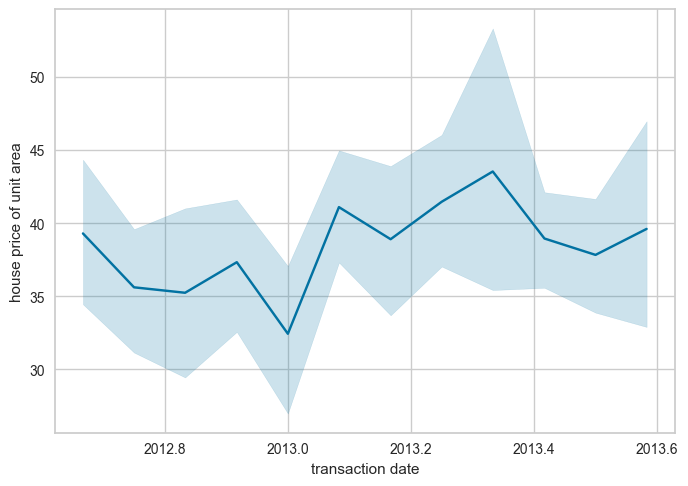

In [33]:
# transaction date Vs. house price of unit area

sns.lineplot(data=train_data, x="transaction date", y="house price of unit area")
plt.show()

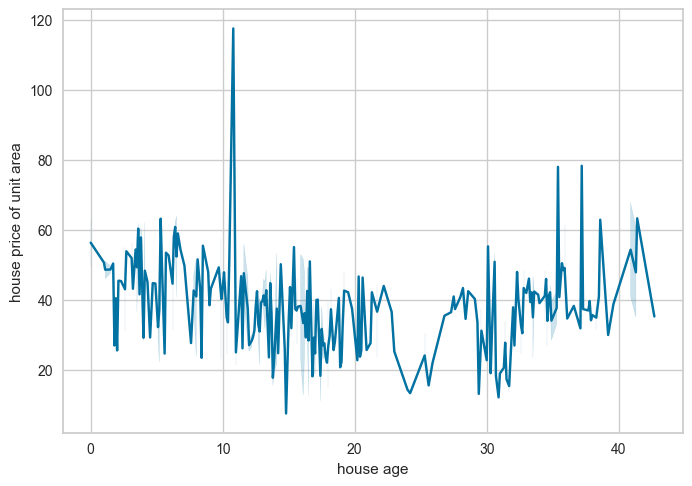

In [35]:
# house age Vs.house price of unit area
sns.lineplot(data=train_data, x="house age", y="house price of unit area")
plt.show()

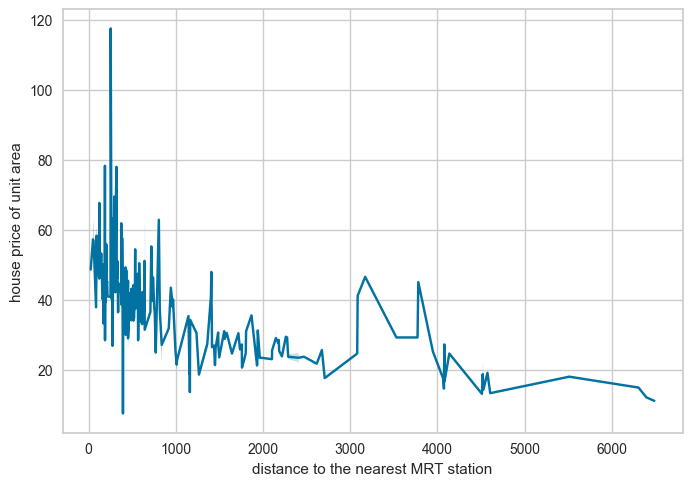

In [36]:
# distance to the nearest MRT station Vs. house price of unit area
sns.lineplot(data=train_data, x="distance to the nearest MRT station", y="house price of unit area")
plt.show()

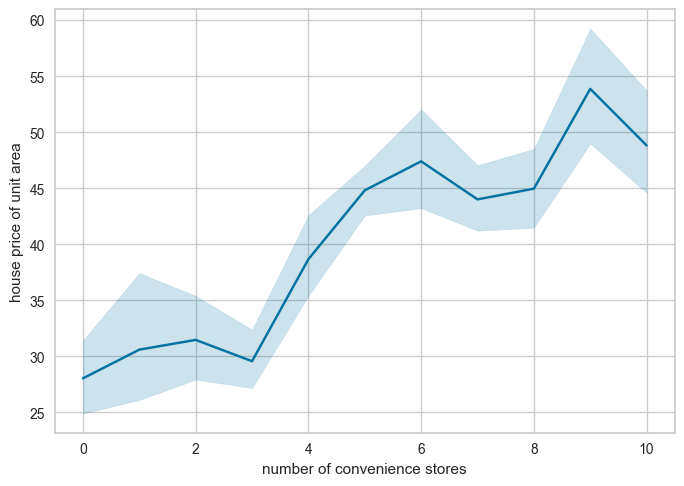

In [37]:
# number of convenience stores Vs. house price of unit area
sns.lineplot(data=train_data, x="number of convenience stores", y="house price of unit area")
plt.show()

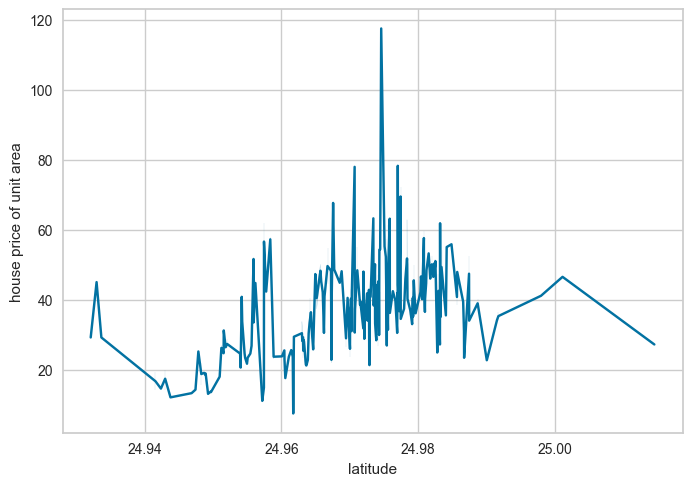

In [39]:
# latitude Vs. house price of unit area
sns.lineplot(data=train_data, x="latitude", y="house price of unit area")
plt.show()

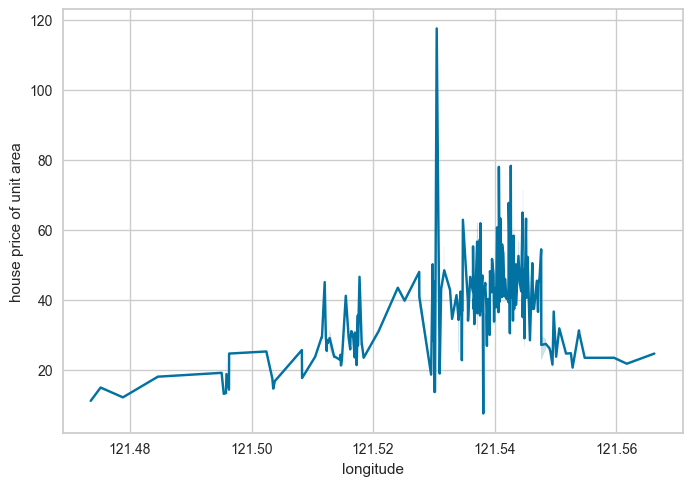

In [40]:
# longitude Vs. house price of unit area
sns.lineplot(data=train_data, x="longitude", y="house price of unit area")
plt.show()

Observations based on graphs:
1. House price of unit area is proportional to the number of convenience stores.
2. Closer the house is to the nearest MRT station, the heigher the house price.

In [41]:
numeric_train = train_data
correlation = numeric_train.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'], ascending=False)

,house price of unit area
house price of unit area,1.000000
number of convenience stores,0.560355
latitude,0.506349
longitude,0.487869
transaction date,0.074428
house age,-0.204193
distance to the nearest MRT station,-0.652540


Correlation Observations:
1. The number of convenience stores is correlated to the price of unit area.
2. Distance to the nearest MRT station less correlated.

<Axes: >

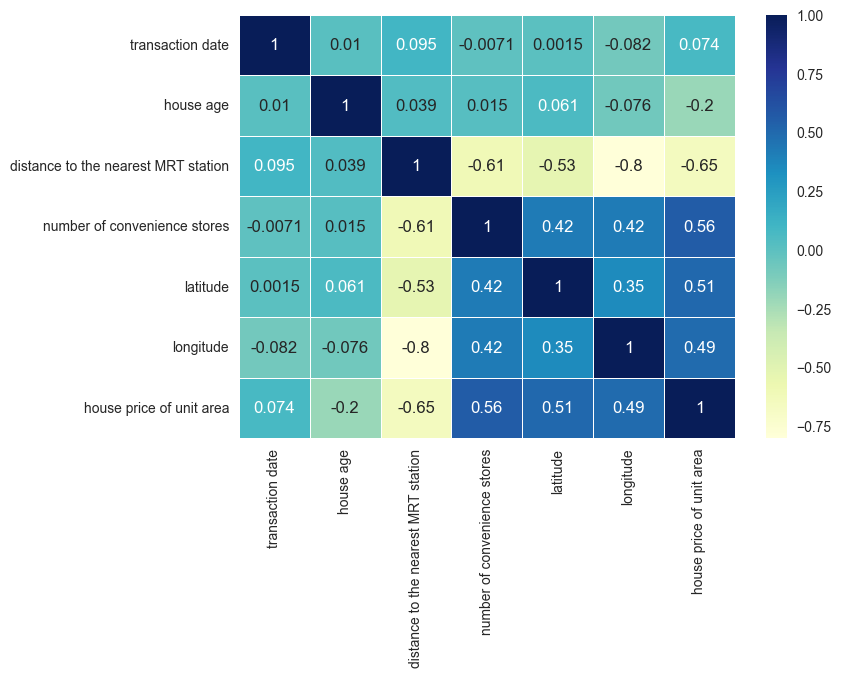

In [44]:
# Plotting correlation heatmap
corr = train_data.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.5)

In [62]:
# Concat to perform preprocessing and scaling
dfs = [train_data, test_data]
data = pd.concat(dfs)

In [63]:
def to_date(data):
    # Split transaction date into year and decimal part
    year_part = data['transaction date'].astype(float).apply(np.floor).astype(int)
    decimal_part = data['transaction date'] - year_part

    # Calculate month and day
    month_part = (decimal_part * 12)
    month = month_part.apply(np.floor).astype(int) + 1  # Months start at 1
    day = ((month_part - (month - 1)) * 30 + 1).astype(int)
    
    # Assign to new columns
    data['year'] = year_part
    data['month'] = month
    data['day'] = day

    # Drop the original column if needed
    data.drop(['transaction date'], axis=1, inplace=True)
    return data

In [64]:
data = to_date(data)

In [51]:
data.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,date,year,month,day
159,15.5,815.93140,4,24.97886,121.53464,37.4,2012-01-01,2012,9,1
95,8.0,104.81010,5,24.96674,121.54067,51.8,2012-01-01,2012,12,1
11,6.3,90.45606,9,24.97433,121.54310,58.1,2013-01-01,2013,4,30
374,5.4,390.56840,5,24.97937,121.54245,49.5,2013-01-01,2013,4,1
165,13.7,1236.56400,1,24.97694,121.55391,30.6,2012-01-01,2012,12,1


In [65]:
data_without_price=data.drop('house price of unit area',axis=1)
house_price=data['house price of unit area']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data_without_price, house_price, test_size=0.2, random_state=1)

print(X_test)

     house age  distance to the nearest MRT station  \
191       13.2                            750.07040   
343       33.5                            563.28540   
275        1.5                             23.38284   
234        8.0                           2216.61200   
208       11.5                           1360.13900   
..         ...                                  ...   
335       27.3                            337.60160   
284       15.0                            383.28050   
183       17.0                           4082.01500   
267       34.7                            482.75810   
298       16.7                           4082.01500   

     number of convenience stores  latitude  longitude  year  month  day  
191                             2  24.97371  121.54951  2013      3    1  
343                             8  24.98223  121.53597  2013      1    1  
275                             7  24.96772  121.54102  2012      9    1  
234                             4  24.9

In [69]:
linear_reg_model = LinearRegression()

In [70]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predict on train data
# pred_train_poly = linear_reg_model.predict(X_train)
pred_train_poly = linear_reg_model.predict([[1,2012.917,32,84.87882,10,24.98298,121.54024,37.9]])

r2_train_poly = r2_score(y_train, pred_train_poly)
mse_train_poly = mean_squared_error(y_train, pred_train_poly)
rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train, pred_train_poly)

print('Training:')
print('R2: ',r2_train_poly)
print('MSE: ',mse_train_poly)
print('RMSE: ',rmse_train_poly)
print('MAE: ',mae_train_poly)


d:\pfizer_case_study\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [331, 1]

In [86]:
pred_test_poly = linear_reg_model.predict(X_test)

r2_test_poly = r2_score(y_test, pred_test_poly)
mse_test_poly = mean_squared_error(y_test, pred_test_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
mae_test_poly = mean_absolute_error(y_test, pred_test_poly)

print(pred_test_poly)
print("Predict on Test data:")
print('R2 Score: ', r2_test_poly)
print('MSE: ', mse_test_poly)
print('RMSE: ', rmse_test_poly)
print('MAE: ', mae_test_poly)

[39.16788724 43.2678716  47.23520956 33.99260802 27.89334031 46.88361677
 41.98207043 38.95720048 33.58286356 12.97231501 31.91431153 43.02416918
 33.72756015 36.81456567 55.08951692 48.29414719 24.8588723  11.58437489
 49.00466297 12.21756336 49.07662585 45.41551712 42.49126185 44.51663265
 48.31561272 15.20535462 49.98814836 45.26619303 34.07702142 47.47742836
 25.26355128 35.40795354  7.12017685 39.67553605 41.02512722 41.80842525
 48.44986878 47.07723208 49.31818672 40.77458425 15.6320132  47.87501023
 46.60529391 34.85160216 36.2378524  41.01483403 40.73520008 40.58814517
 40.36222109 48.93093735 43.65385752 46.48346887 31.96430853 40.25766234
 40.81538218 44.94959879 55.52287621 34.48648632 10.64566126 41.95544345
 30.62126748 37.59543788 31.35368623 43.09203661 35.20232559 33.14474368
 46.88532125 46.06099136 41.93529923 33.77721713 12.41124515 20.68067868
 46.9048806  41.18638861 47.3273683  49.70112529 30.5641581  10.70486677
 43.02972733 42.87410357 15.18336758 37.22475495 15

In [73]:
import pickle

In [74]:
pickle.dump(linear_reg_model, open('../ai_model/my_linear_regression.pkl','wb'))

In [75]:
pickle.dump(df, open('../ai_model/my_dataframes.pkl','wb'))

In [79]:
# my_model = pickle.load("../ai_model/my_linear_regression.pkl")

with open("../ai_model/my_linear_regression.pkl", "rb") as f:
    my_model = pickle.load(f)

    print(type(my_model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [80]:
with open("../ai_model/my_dataframes.pkl", "rb") as f:
    my_df = pickle.load(f)

    print(type(my_df))

<class 'pandas.core.frame.DataFrame'>


In [81]:
api_request = {
    "transaction_date": 2012.917,
    "house_age": 5,
    "distance_to_mrt": 100, 
    "num_convenience_stores": 20
}

In [82]:
input_df = pd.DataFrame([api_request])
print(input_df)

   transaction_date  house_age  distance_to_mrt  num_convenience_stores
0          2012.917          5              100                      20


In [85]:
processed = my_df.transform(input_df)
# prediction = my_model.predict(processed)

# print(prediction)

SpecificationError: nested renamer is not supported

In [84]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
